# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Feature engineering in Pandas

</font>
</div>

# Droping columns or rows
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- The most simple solution to the missing values is to drop the rows or the entire column. 
- There is not an optimum threshold for dropping but you can use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold. 

</font>
</div>

In [ ]:
threshold = 0.7
# Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

# Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]

# Numerical imputation
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Imputation is a more preferable option rather than dropping because it preserves the data size. 
- A good imputation way is to use the medians of the columns. 
- As the averages of the columns are sensitive to the outlier values, while medians are more solid in this respect.

</font>
</div>

In [ ]:
# Filling all missing values with 0
data = data.fillna(0)
# Filling missing values with medians of the columns
data = data.fillna(data.median())

# Categorical imputation
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Replacing the missing values with the maximum occurred value in a column is a good option for handling categorical columns. 
- But if you think the values in the column are distributed uniformly and there is not a dominant value, imputing a category like “Other” might be more sensible, because in such a case, your imputation is likely to converge a random selection.

</font>
</div>

In [ ]:
# Max fill function for categorical columns
data['column_name'].fillna(data['column_name'].value_counts().idxmax(), inplace=True)

# Outlier Detection with Standard Deviation
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- If a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier. 
- **Then what x should be?** Usually, a value between 2 and 4 seems practical.
- **Z-score** (or standard score) can be used instead. This standardizes the distance between a value and the mean using the standard deviation.

</font>
</div>

In [ ]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['column'].mean () + data['column'].std () * factor
lower_lim = data['column'].mean () - data['column'].std () * factor

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

# Outlier Detection with Percentiles
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- A percentile gives you the scalar value below which xx% of points lay.
- Say 95% percentile, will give the scalar value below which the the 95% of the data are.
- Keep in mind there is subtle differente between quantile and percentile.

</font>
</div>

In [ ]:
#Dropping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

# An Outlier Dilemma: Drop or Cap
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Another option for handling outliers is to cap them instead of dropping. 
- So you can keep your data size and at the end of the day, it might be better for the final model performance.
- On the other hand, capping can affect the distribution of the data, thus it better not to exaggerate it.

</font>
</div>

In [ ]:
#Capping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)

data.loc[(df[column] > upper_lim),column] = upper_lim
data.loc[(df[column] < lower_lim),column] = lower_lim

# Binning
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Binning can be applied on both categorical and numerical data
- The main motivation of binning is to make the model robust and prevent overfitting.
- **However**, every time you bin something, you sacrifice information and make your data more regularized.

</font>
</div>

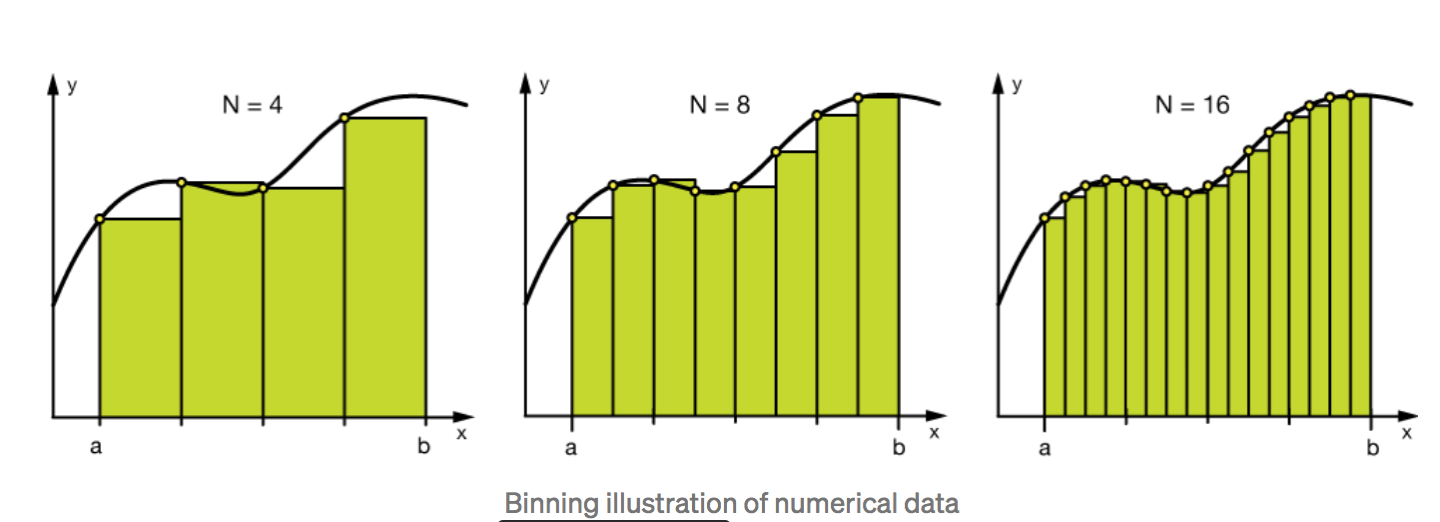

In [ ]:
"""
# Numerical Binning ExampleValue      Bin       
0-30   ->  Low       
31-70  ->  Mid       
71-100 ->  High

# Categorical Binning ExampleValue      Bin       
Spain  ->  Europe      
Italy  ->  Europe       
Chile  ->  South America
Brazil ->  South America
"""

conditions = [
    data['Country'].str.contains('Spain'),
    data['Country'].str.contains('Italy'),
    data['Country'].str.contains('Chile'),
    data['Country'].str.contains('Brazil')]

choices = ['Europe', 'Europe', 'South America', 'South America']

data['Continent'] = np.select(conditions, choices, default='Other')     

"""
    Country      Continent
0      Spain         Europe
1      Chile  South America
2  Australia          Other
3      Italy         Europe
4     Brazil  South America
"""

# Log transform
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
- In most of the cases the magnitude order of the data changes within the range of the data. For instance, the difference between ages 15 and 20 is not equal to the ages 65 and 70. In terms of years, yes, they are identical, but for all other aspects, 5 years of difference in young ages mean a higher magnitude difference. This type of data comes from a multiplicative process and log transform normalizes the magnitude differences like that.
- It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.
- **ATTENTION** The data you apply log transform must have only positive values, otherwise you receive an error. Also, you can add 1 to your data before transform it. A hack is to add 1: -> **Log(x+1)**

</font>
</div>

In [ ]:
#Log Transform Example
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})

data['log+1'] = (data['value']+1).transform(np.log)

#Negative Values Handling
#Note that the values are different
data['log'] = (data['value']-data['value'].min()+1) 
.transform(np.log)   

value  log(x+1)  log(x-min(x)+1)
0      2   1.09861          3.25810
1     45   3.82864          4.23411
2    -23       nan          0.00000
3     85   4.45435          4.69135
4     28   3.36730          3.95124
5      2   1.09861          3.25810
6     35   3.58352          4.07754
7    -12       nan          2.48491

# One-hot encoding
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.

</font>
</div>

In [ ]:
encoded_columns = pd.get_dummies(data['column'])
data = data.join(encoded_columns).drop('column', axis=1)

# Grouping operations
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- We have to make a distinction between numerical (easy) + categorical data (more involved). 

</font>
</div>

## Categorical Column Grouping

<div class="alert alert-info">
<font color=black>

- The **first option** is to select the label with the highest frequency. 
- In other words, this is the max operation for categorical columns, but ordinary max functions generally do not return this value, you need to use a lambda function for this purpose.

</font>
</div>

In [ ]:
data.groupby('id').agg(lambda x: x.value_counts().index[0])

<div class="alert alert-info">
<font color=black>

- **Second option* is to make a pivot table. 
- This approach is much more flexible

</font>
</div>

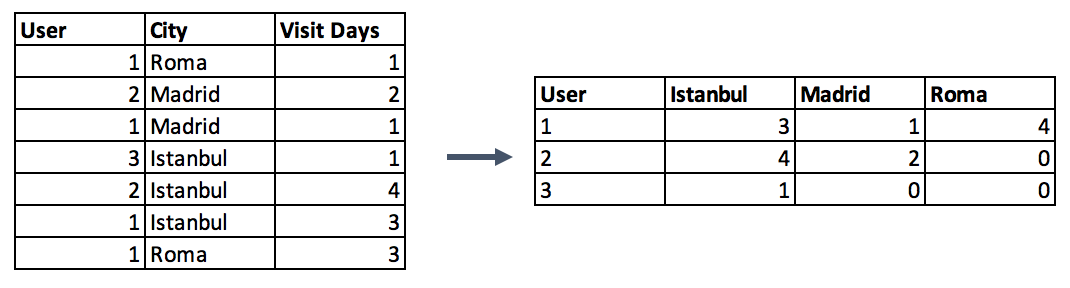

In [ ]:
#Pivot table Pandas Example
data.pivot_table(index='column_to_group', 
columns='column_to_encode', values='aggregation_column', 
aggfunc=np.sum, fill_value = 0)

## Numerical Column Grouping

<div class="alert alert-info">
<font color=black>

- Numerical columns are grouped using sum and mean functions in most of the cases.

</font>
</div>

In [ ]:
#sum_cols: List of columns to sum
#mean_cols: List of columns to average
grouped = data.groupby('column_to_group')

sums = grouped[sum_cols].sum().add_suffix('_sum')
avgs = grouped[mean_cols].mean().add_suffix('_avg')

new_df = pd.concat([sums, avgs], axis=1)

# Feature split
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- There is no one way of splitting features. 

</font>
</div>

In [ ]:
data.name
"""
0  Luther N. Gonzalez
1    Charles M. Young
2        Terry Lawson
3       Kristen White
4      Thomas Logsdon#Extracting first names
"""
data.name.str.split(" ").map(lambda x: x[0])
"""
0     Luther
1    Charles
2      Terry
3    Kristen
4     Thomas#Extracting last names
"""
data.name.str.split(" ").map(lambda x: x[-1])

"""
0    Gonzalez
1       Young
2      Lawson
3       White
4     Logsdon
"""

# Scaling
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Scaling is the process by which the feature range becomes identitical.
- Normalisation (or min-max normalization) scale all values in a fixed range between 0 and 1. 
- This transformation does not change the distribution of the feature and due to the decreased standard deviations, the effects of the outliers increases. 
- Therefore, before normalization, it is recommended to handle the outliers.

</font>
</div>

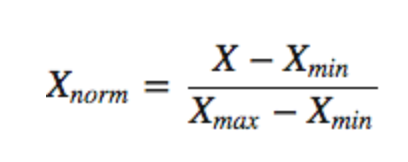

In [2]:
import pandas as pd
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})

data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())

In [3]:
data

,value,normalized
0,2,0.231481
1,45,0.629630
2,-23,0.000000
3,85,1.000000
4,28,0.472222
5,2,0.231481
6,35,0.537037
7,-12,0.101852


# Standardisation
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Standardization (or z-score normalization) scales the values while taking into account standard deviation. 
- If the standard deviation of features is different, their **range** also would differ from each other. 
- This reduces the effect of the outliers in the features.

</font>
</div>

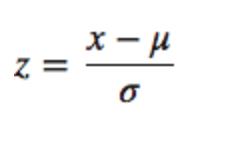

In [4]:
data1 = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})

data1['standardized'] = (data1['value'] - data1['value'].mean()) / data1['value'].std()

In [5]:
data1

,value,standardized
0,2,-0.518878
1,45,0.703684
2,-23,-1.229670
3,85,1.840952
4,28,0.220346
5,2,-0.518878
6,35,0.419367
7,-12,-0.916922


# Extracting date
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- There are 3 options:
    - Extracting the parts of the date into different columns: Year, month, day, etc.
    - Extracting the time period between the current date and columns in terms of years, months, days, etc.
    - Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.    

</font>
</div>

In [6]:
from datetime import date

data = pd.DataFrame({'date':
['01-01-2017',
'04-12-2008',
'23-06-1988',
'25-08-1999',
'20-02-1993',
]})

#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()

In [7]:
data

,date,year,month,passed_years,passed_months,day_name
0,2017-01-01,2017,1,4,55,Sunday
1,2008-12-04,2008,12,13,152,Thursday
2,1988-06-23,1988,6,33,398,Thursday
3,1999-08-25,1999,8,22,264,Wednesday
4,1993-02-20,1993,2,28,342,Saturday


# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114 

</font>
</div>